In [1]:
!pip install keras-multi-head

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-multi-head: filename=keras_multi_head-0.29.0-py3-none-any.whl size=14975 sha256=392b59eb31bd58b5312a1ea89f476425384cea9cd101dda1571116b472f49583
  Stored in directory: /root/.cache/pip/wheels/19/fe/36/14fd933930357c34331e65e11aa5380e35188df2223b113358
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=48464c7dd5b18d291ef4c4a2bd45da04175d5c30cd490355df2985e963566fad
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-multi-head keras-self-attention


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import os

In [5]:
file_path = "/content/drive/MyDrive/IMU/combined_data.xlsx"

# Load the Excel file
data = pd.read_excel(file_path)

In [6]:
# Check if 'label' column exists
if 'label' in data.columns:
    # Count occurrences of 0 and 1
    label_counts = data['label'].value_counts()

    # Print counts
    count_0 = label_counts.get(0, 0)  # Get count of 0, default to 0 if not found
    count_1 = label_counts.get(1, 0)  # Get count of 1, default to 0 if not found

    print(f"Total count of 0 in 'label': {count_0}")
    print(f"Total count of 1 in 'label': {count_1}")
else:
    print("Column 'label' not found in the dataset")

Total count of 0 in 'label': 187102
Total count of 1 in 'label': 131798


# **DATA RE-STRUCTURING**

In [7]:
frame_size=100
outputs_label = []  # List to store labels (binary)
all_frames = []  # List to store data frames
print("length of data= ", len(data))

length of data=  318900


In [8]:
# Nan Values dropped while creating excel file ... so need to do here
# Remainder when dividing the total number of rows by frame_size is already calculated.
# Remainder =  0

In [9]:
all_frames = []
all_labels = []

for i in range(0, len(data), frame_size):
    frame = []  # Store sensor data for this frame
    labels_in_frame = data.iloc[i:i+frame_size]['label'].values  # Get labels in this frame

    # Extract sensor values (right acceleration X, Y, Z)
    for _, row in data.iloc[i:i+frame_size].iterrows():
        frame.extend(row[['right acceleration X[g]', 'right acceleration Y[g]', 'right acceleration Z[g]']].values)

    # Assign label using majority vote
    frame_label = 1 if (labels_in_frame.sum() > frame_size / 2) else 0

    # Store results
    all_frames.append(frame)
    all_labels.append(frame_label)


In [10]:
# Assuming all_frames has 100 frames, each frame has 300 sensor values (100 * 3 sensor columns)
print("Shape of all_frames:", len(all_frames), "frames")
print("Shape of the first frame:", len(all_frames[0]))  # Should output 300 sensor values

# If all_labels has 100 labels, each representing a frame
print("Shape of all_labels:", len(all_labels))
print("Sets in all_labels:", set(all_labels))

Shape of all_frames: 3189 frames
Shape of the first frame: 300
Shape of all_labels: 3189
Sets in all_labels: {0, 1}


# **DATA VISUALIZATION**



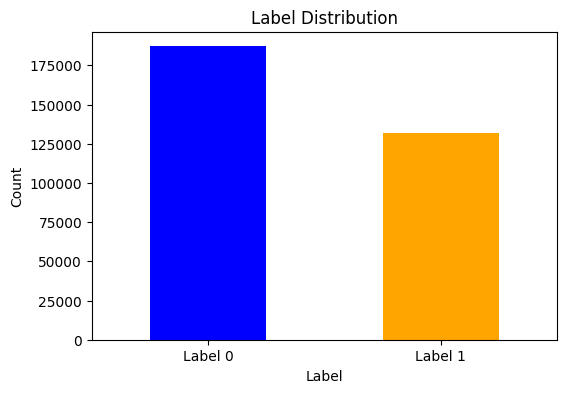

In [11]:
# Plot the distribution of labels (0 vs 1)
plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Label 0', 'Label 1'], rotation=0)
plt.show()


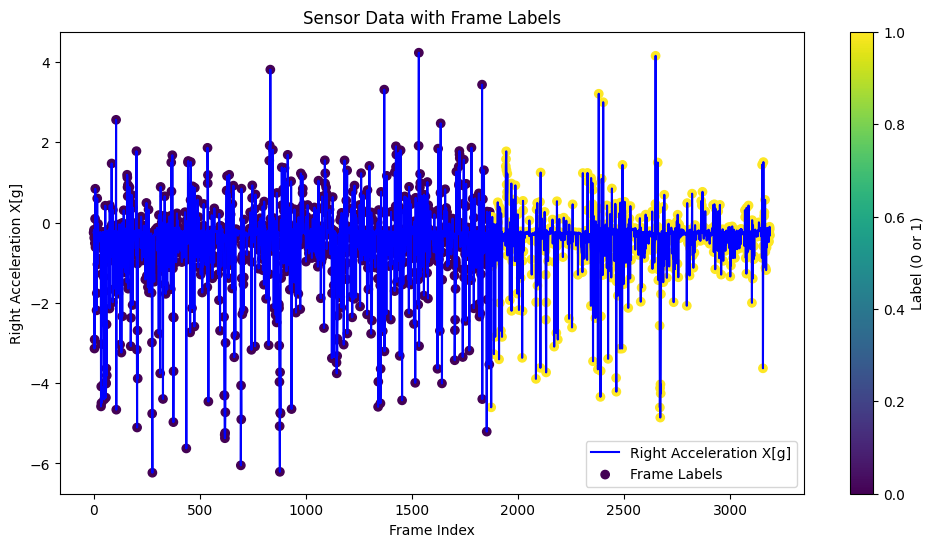

In [12]:
# Assuming `all_frames` and `all_labels` are lists containing the sensor data and labels for each frame
frame_indices = range(len(all_frames))

# Plot sensor data and labels for each frame
plt.figure(figsize=(12, 6))

# Plot first sensor value (X) for each frame
plt.plot(frame_indices, [frame[0] for frame in all_frames], label='Right Acceleration X[g]', color='blue')

# Color the points based on the label for each frame
plt.scatter(frame_indices, [frame[0] for frame in all_frames], c=all_labels, cmap='viridis', label='Frame Labels')

plt.title('Sensor Data with Frame Labels')
plt.xlabel('Frame Index')
plt.ylabel('Right Acceleration X[g]')
plt.legend()
plt.colorbar(label='Label (0 or 1)')
plt.show()


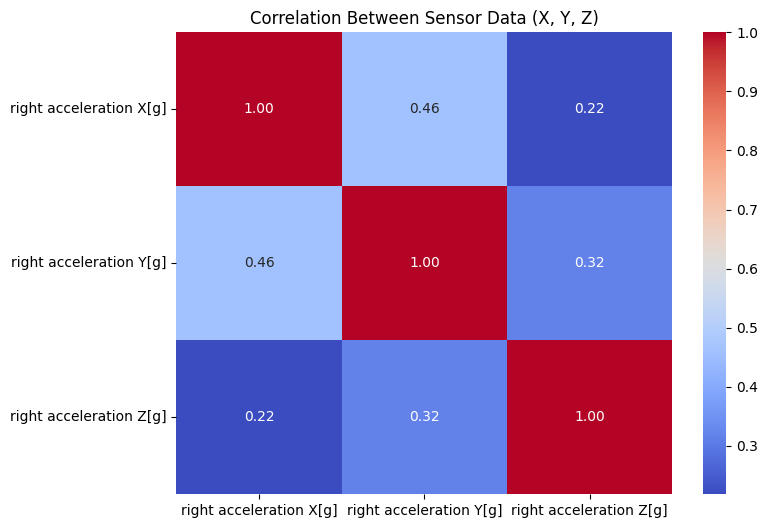

In [13]:
import seaborn as sns

# Get the correlation matrix between sensors (X, Y, Z)
correlation_matrix = data[['right acceleration X[g]', 'right acceleration Y[g]', 'right acceleration Z[g]']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Sensor Data (X, Y, Z)')
plt.show()


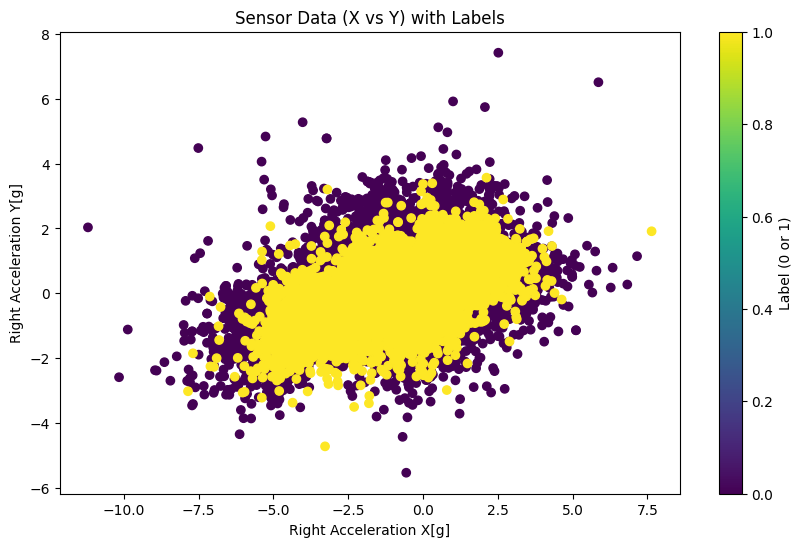

In [14]:
# Assuming `data` has columns 'label', 'right acceleration X[g]', 'right acceleration Y[g]', 'right acceleration Z[g]'
plt.figure(figsize=(10, 6))

# Plot X vs Y colored by label
plt.scatter(data['right acceleration X[g]'], data['right acceleration Y[g]'], c=data['label'], cmap='viridis')

plt.title('Sensor Data (X vs Y) with Labels')
plt.xlabel('Right Acceleration X[g]')
plt.ylabel('Right Acceleration Y[g]')
plt.colorbar(label='Label (0 or 1)')
plt.show()


In [11]:
import torch
import pandas as pd

a_frame = {'label': []}
# count_1 = 0

# Iterate through all_frames and outputs
for frames, labels in zip (all_frames, all_labels):
    for i, f in enumerate(frames):
        if i not in a_frame:
            a_frame[i] = []
        a_frame[i].append(f)

    # Append labels to the dictionary
    a_frame['label'].append(torch.tensor(labels, dtype=torch.long))

len(a_frame)

301

In [12]:
# Print first 5 values from a random sensor (e.g., sensor 0)
print("First 5 values of sensor 0:", a_frame[0][:5])
print("First 5 values of sensor 1:", a_frame[1][:5])
print("First 5 values of sensor 2:", a_frame[2][:5])
print("First 5 values of sensor 299:", a_frame[299][:5])


First 5 values of sensor 0: [np.float64(-0.249023), np.float64(-0.237793), np.float64(-0.177246), np.float64(-0.378418), np.float64(-3.137207)]
First 5 values of sensor 1: [np.float64(0.089844), np.float64(0.099609), np.float64(0.114258), np.float64(-1.136719), np.float64(-1.635254)]
First 5 values of sensor 2: [np.float64(0.975586), np.float64(0.976074), np.float64(1.020996), np.float64(1.83252), np.float64(-0.961426)]
First 5 values of sensor 299: [np.float64(0.968262), np.float64(1.030273), np.float64(2.373047), np.float64(-0.211914), np.float64(2.256348)]


In [13]:
# Print first 10 labels
print("First 10 labels:", a_frame['label'][:10])

print("Last 10 labels:", a_frame['label'][-10:])

First 10 labels: [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
Last 10 labels: [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]


In [14]:
print(len(a_frame))
df=pd.DataFrame(a_frame)
df.head()

301


,label,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,tensor(0),-0.249023,0.089844,0.975586,-0.251465,0.093262,0.968262,-0.242188,0.090332,0.975098,...,0.968750,-0.242188,0.102051,0.973145,-0.240723,0.101074,0.973633,-0.239746,0.098145,0.968262
1,tensor(0),-0.237793,0.099609,0.976074,-0.242188,0.098145,0.972656,-0.239258,0.101074,0.974609,...,1.001465,-0.162109,0.082031,0.991211,-0.186523,0.094727,1.027344,-0.180176,0.099609,1.030273
2,tensor(0),-0.177246,0.114258,1.020996,-0.184570,0.106934,1.036133,-0.179199,0.108887,1.030762,...,1.113281,-0.632324,0.020508,-0.137207,-0.957031,-0.341797,2.833496,-0.747559,-1.865723,2.373047
3,tensor(0),-0.378418,-1.136719,1.832520,-0.359375,0.725098,1.540039,-0.357910,0.317383,1.375488,...,-0.072754,-3.561035,-1.218750,-0.275879,-3.508789,-1.294922,-0.295410,-3.238770,-1.000977,-0.211914
4,tensor(0),-3.137207,-1.635254,-0.961426,-3.137207,-1.635254,-0.961426,1.355957,-0.495605,2.506836,...,2.759277,-2.028809,0.021484,2.499023,-2.362305,-0.221680,2.376465,-2.614746,-0.349121,2.256348


#**MODEL**



In [15]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy

In [25]:
class PostionalEncoding(nn.Module):
    def __init__(
        self,
        dropout: float=0.1,
        max_seq_len: int=5000,
        d_model: int=512,
        batch_first: bool=False    ):
        super().__init__()

        self.d_model = d_model
        self.dropout = nn.Dropout(p=dropout)
        self.batch_first = batch_first
        self.x_dim = 1 if batch_first else 0

        position = torch.arange(max_seq_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_seq_len, 1, d_model)


        pe[:, 0, 0::2] = torch.sin(position * div_term)

        pe[:, 0, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe)

        #print("Position Encoding Shape:", self.pe.shape)  # Shape of pe after initialization

    def forward(self, x):
        batch_size = x.shape[0]  # Get the batch size     # 7
        seq_len = x.shape[1]  # Get the sequence length   # 200

        #print("Input shape (x):", x.shape)  # Debugging: Print input shape    # torch.Size([7, 200])
        #print("Using Position Encoding Shape:", self.pe.shape)  # Debugging


        # Expand the positional encoding to match the batch size
        # and sequence length of the input tensor
        # pe_expanded = self.pe[:seq_len, :].repeat(1, batch_size, 1)

        pe_expanded = self.pe[:seq_len, :].expand(-1, batch_size, -1)

        # Permute the positional encoding to match the input tensor
        pe_expanded = pe_expanded.permute(1, 0, 2)
        #print("Expanded Position Encoding Shape:", pe_expanded.shape)  # Shape of pe_expanded before adding to x

        x = x + pe_expanded

        x = self.dropout(x)

        return x

class EncoderLayer(nn.Module):

    def __init__(self, d_model, ffn_hidden, n_head, drop_prob,details):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(d_model=d_model, n_head=n_head, details=details)
        self.norm1 = LayerNorm(d_model=d_model)
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.details = details
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm2 = LayerNorm(d_model=d_model)
        self.dropout2 = nn.Dropout(p=drop_prob)

    def forward(self, x):
        # 1. compute self attention
        _x = x
        x = self.attention(q=x, k=x, v=x )

        # if self.details:
        #   print('in encoder layer : '+ str(x.size()))
        # 2. add and norm
        x = self.dropout1(x)
        x = self.norm1(x + _x)

        # if self.details:
        #   print('in encoder after norm layer : '+ str(x.size()))
        # 3. positionwise feed forward network
        _x = x
        x = self.ffn(x)

        # if self.details:
        #   print('in encoder after ffn : '+ str(x.size()))
        # 4. add and norm
        x = self.dropout2(x)
        x = self.norm2(x + _x)
        return x

class Encoder(nn.Module):

    def __init__(self, d_model, ffn_hidden, n_head, n_layers, drop_prob,details, device):
        super().__init__()


        self.layers = nn.ModuleList([EncoderLayer(d_model=d_model,
                                                  ffn_hidden=ffn_hidden,
                                                  n_head=n_head
                                                  ,details=details,
                                                  drop_prob=drop_prob)
                                     for _ in range(n_layers)])

    def forward(self, x ):
        for layer in self.layers:
            x = layer(x )
            #print('in encoder layer : '+ str(x.size()))
        return x

class ClassificationHead(nn.Module):
    def __init__(self, d_model, seq_len, details, n_classes: int = 2):
      super().__init__()
      self.norm = nn.LayerNorm(d_model)
      self.details = details
      self.seq = nn.Sequential( nn.Flatten() , nn.Linear(d_model * seq_len , 512) ,nn.ReLU(),nn.Linear(512, 256)
                               ,nn.ReLU(),nn.Linear(256, 128),nn.ReLU(),nn.Linear(128, n_classes))

    def forward(self,x):

      #if self.details:
         #print('in classification head : '+ str(x.size()))
      x= self.norm(x)
      #x= self.flatten(x)

      ###### New code
      # Calculate the correct flattened dimension
      flattened_dim = x.shape[1] * x.shape[2]  # seq_len * d_model
      # Update the first linear layer in seq
      self.seq[1] = nn.Linear(flattened_dim, 512)

      ######End New Code


      x= self.seq(x)
      # if self.details:
      #   print('in classification head after seq: '+ str(x.size()))
      return x

In [26]:
class Transformer(nn.Module):

    def __init__(self,device, d_model=100, n_head=4, max_len=5000, seq_len=200,
                 ffn_hidden=128, n_layers=2, drop_prob=0.1, details =False):
        super().__init__()
        self.device = device
        self.details = details
        self.encoder_input_layer = nn.Linear(
            in_features=3,
            out_features=d_model
            )

        self.pos_emb = PostionalEncoding( max_seq_len=max_len,batch_first=False, d_model=d_model, dropout=0.1)
        self.encoder = Encoder(d_model=d_model,
                               n_head=n_head,
                               ffn_hidden=ffn_hidden,
                               drop_prob=drop_prob,
                               n_layers=n_layers,
                               details=details,
                               device=device)
        self.classHead = ClassificationHead(seq_len=seq_len,d_model=d_model,details=details,n_classes=2)

    def forward(self, src ):
        # if self.details:
        #   print('before input layer: '+ str(src.size()) )
        src= self.encoder_input_layer(src)
        # if self.details:
        #   print('after input layer: '+ str(src.size()) )
        src= self.pos_emb(src)
        # if self.details:
        #   print('after pos_emb: '+ str(src.size()) )
        enc_src = self.encoder(src)
        cls_res = self.classHead(enc_src)
        # if self.details:
        #   print('after cls_res: '+ str(cls_res.size()) )
        return cls_res

class ScaleDotProductAttention(nn.Module):
    """
    compute scale dot product attention

    Query : given sentence that we focused on (decoder)
    Key : every sentence to check relationship with Qeury(encoder)
    Value : every sentence same with Key (encoder)
    """

    def __init__(self, details):
        super(ScaleDotProductAttention, self).__init__()
        self.softmax = nn.Softmax(dim=-1)
        self.details = details
    def forward(self, q, k, v ,e=1e-12):
        # input is 4 dimension tensor
        # [batch_size, head, length, d_tensor]
        batch_size, head, length, d_tensor = k.size()

        # 1. dot product Query with Key^T to compute similarity
        k_t = k.transpose(2, 3)  # transpose

        # if self.details:
        #   print('in Scale Dot Product, k_t size: '+ str(k_t.size()))
        score = (q @ k_t) / math.sqrt(d_tensor)  # scaled dot product


        # if self.details:
        #   print('in Scale Dot Product, score size: '+ str(score.size()))
        # 3. pass them softmax to make [0, 1] range
        score = self.softmax(score)

        # if self.details:
        #   print('in Scale Dot Product, score size after softmax : '+ str(score.size()))

        # if self.details:
        #   print('in Scale Dot Product, v size: '+ str(v.size()))
        # 4. multiply with Value
        v = score @ v

        # if self.details:
        #   print('in Scale Dot Product, v size after matmul: '+ str(v.size()))
        return v, score

class LayerNorm(nn.Module):
    def __init__(self, d_model, eps=1e-12):
        super(LayerNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(d_model))
        self.beta = nn.Parameter(torch.zeros(d_model))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        var = x.var(-1, unbiased=False, keepdim=True)
        # '-1' means last dimension.

        out = (x - mean) / torch.sqrt(var + self.eps)
        out = self.gamma * out + self.beta
        return out

class PositionwiseFeedForward(nn.Module):

    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x

class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, n_head, details):
        super(MultiHeadAttention, self).__init__()
        self.n_head = n_head
        self.attention = ScaleDotProductAttention( details=details)
        self.w_q = nn.Linear(d_model, d_model)
        self.w_k = nn.Linear(d_model, d_model)
        self.w_v = nn.Linear(d_model, d_model)
        self.w_concat = nn.Linear(d_model, d_model)
        self.details = details

    def forward(self, q, k, v ):
        # 1. dot product with weight matrices

        q, k, v = self.w_q(q), self.w_k(k), self.w_v(v)

        # if self.details:
        #   print('in Multi Head Attention Q,K,V: '+ str(q.size()))
        # 2. split tensor by number of heads
        q, k, v = self.split(q), self.split(k), self.split(v)

        # if self.details:
        #   print('in splitted Multi Head Attention Q,K,V: '+ str(q.size()))
        # 3. do scale dot product to compute similarity
        out, attention = self.attention(q, k, v )

        # if self.details:
        #   print('in Multi Head Attention, score value size: '+ str(out.size()))
        # 4. concat and pass to linear layer
        out = self.concat(out)
        out = self.w_concat(out)

        # 5. visualize attention map
        # TODO : we should implement visualization

        # if self.details:
        #   print('in Multi Head Attention, score value size after concat : '+ str(out.size()))
        return out

    def split(self, tensor):
        """
        split tensor by number of head

        :param tensor: [batch_size, length, d_model]
        :return: [batch_size, head, length, d_tensor]
        """
        batch_size, length, d_model = tensor.size()
        d_tensor = d_model // self.n_head
        tensor = tensor.view(batch_size, length, self.n_head, d_tensor).transpose(1, 2)
        # it is similar with group convolution (split by number of heads)

        return tensor

    def concat(self, tensor):
        """
        inverse function of self.split(tensor : torch.Tensor)

        :param tensor: [batch_size, head, length, d_tensor]
        :return: [batch_size, length, d_model]
        """
        batch_size, head, length, d_tensor = tensor.size()
        d_model = head * d_tensor

        tensor = tensor.transpose(1, 2).contiguous().view(batch_size, length, d_model)
        return tensor

In [27]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class IMUdataset(Dataset):
    def __init__(self,x,y)  :
        super().__init__()
        #file_out = pd.read_csv(fileName)
        #x = file_out.iloc[:,:-1].values
        #y = file_out.iloc[:,-1:].values
        self.X = torch.tensor(x, dtype=torch.float32)
        self.Y = torch.tensor(y, dtype=torch.long)

        print('X shape: '+ str(self.X.size()))  # torch.Size([2510, 300])   # torch.Size([628, 300])    # new torch.Size([2510, 100, 3]) / ([628, 100, 3])
        print('Y shape: '+ str(self.Y.size()))    # torch.Size([2510, 1])   # torch.Size([628, 1])      # new torch.Size([2510, 1])  /  ([628, 1])

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, index):
        #return self.X[index].unsqueeze(1), self.Y[index]
        return self.X[index], self.Y[index] # Remove unsqueeze(1)   # Return features and labels


# class MyTestDataLoader():
#     def __init__(self, batch_size) -> None:
#         self.batch_size = batch_size
#         file_out_test = pd.read_csv('mitbih_test.csv')

#         x_test = file_out_test.iloc[:,:-1].values
#         y_test = file_out_test.iloc[:,-1:].astype(dtype=int).values

#         # Reshape to (num_samples, 100, 3)
#         x_test = x_test.reshape(x_test.shape[0], 100, 3)

#         print("Testinggggggggggggggggg Reshaped x_test shape:", x_test.shape)  # Debugging

#         test_set= IMUdataset(x= x_test, y= y_test)
#         self.dataLoader= DataLoader(test_set, batch_size=self.batch_size, shuffle=True,  )

#     def getDataLoader(self):
#         return self.dataLoader

class myDataLoader():
    def __init__(self, batch_size) -> None:
        self.batch_size = batch_size

        x_train = df.iloc[:, 1:].values   # exclude label column
        y_train = df.iloc[:, 0].astype(dtype=int).values.reshape(-1, 1)  # get labels from first column

        #x_train = all_frames
        #y_train = outputs
        x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20 )

        x_train = np.array(x_train)
        y_train = np.array(y_train)

        x_train = x_train.reshape(x_train.shape[0], 100, 3)
        x_val = x_val.reshape(x_val.shape[0], 100, 3)


        # x_train = x_train.reshape(x_train.shape[0], 100, 3)
        # x_val = x_val.reshape(x_val.shape[0], 100, 3)


        # Print shapes for debugging
        print("x_train shape on batch size =  ", x_train.shape)  # Should be (num_samples, 300)  # x_train shape: (2510, 300)    # new (2510, 100, 3)
        print("y_train shape on batch size =  ", y_train.shape)  # Should be (num_samples,)      # y_train shape: (2510, 1)      # new (2510, 1)
        print('x_val shape on batch size =  ' + str(x_val.shape))
        print('y_val shape on batch size =  ' + str( y_val.shape) )

        train_set= IMUdataset(x= x_train, y= y_train)

        val_set= IMUdataset(x= x_val, y= y_val)

        dataloaders = {
            'train': DataLoader(train_set, batch_size=batch_size, shuffle=True,  ),
            'val': DataLoader(val_set, batch_size=batch_size, shuffle=True,  )
        }
        self.dataloaders = dataloaders


    def getDataLoader(self):
        return self.dataloaders

In [28]:
def cross_entropy_loss(pred, target):

    criterion = nn.CrossEntropyLoss()
    #print('pred : '+ str(pred ) + ' target size: '+ str(target.size()) + 'target: '+ str(target )+   ' target2: '+ str(target))
    #print(  str(target.squeeze( -1)) )
    target=target.long()
    #pred=pred.long()
    lossClass= criterion(pred, target )

    return lossClass


def calc_loss_and_score(pred, target, metrics):
    softmax = nn.Softmax(dim=1)

    pred =  pred.squeeze( -1)
    target= target.squeeze( -1)

    ce_loss = cross_entropy_loss(pred, target)
    #metrics['loss'] += ce_loss.data.cpu().numpy() * target.size(0)
    #metrics['loss'] += ce_loss.item()* target.size(0)
    metrics['loss'] .append( ce_loss.item() )
    pred = softmax(pred )

    #lossarr.append(ce_loss.item())
    #print('metrics : '+ str(ce_loss.item())  )
    #print('predicted max before = '+ str(pred))
    #pred = torch.sigmoid(pred)
    _,pred_labels = torch.max(pred, dim=1)


    #print('predicted max = '+ str(pred ))
    #print('target = '+ str(target ))
    metrics['correct']  += torch.sum(pred_labels ==target ).item()
    #print('correct sum =  '+ str(torch.sum(pred==target ).item()))
    metrics['total']  += target.size(0)
    #print('target size  =  '+ str(target.size(0)) )

    return ce_loss


def print_metrics(main_metrics_train,main_metrics_val,metrics, phase):

    correct= metrics['correct']
    total= metrics['total']
    accuracy = 100*correct / total
    loss= metrics['loss']

    if phase == 'train':
        main_metrics_train['loss'].append(np.mean(loss))
        main_metrics_train['accuracy'].append(accuracy)

    else:
        main_metrics_val['loss'].append(np.mean(loss))
        main_metrics_val['accuracy'].append(accuracy)


    result = "phase: "+str(phase) \
    +  ' \nloss : {:4f}'.format(np.mean(loss))   +    ' accuracy : {:4f}'.format(accuracy)        +"\n"
    return result



def train_model(dataloaders,model,optimizer, num_epochs=25):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10
    train_dict = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    val_dict = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    all_preds = []
    all_labels = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['val', 'train']:
            if phase == 'train':
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])

                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = {'loss': [], 'correct': 0, 'total': 0}

            for inputs, labels in dataloaders[phase]:
                #print(f"Input shape: {inputs.shape}")  # Should be (batch_size, sequence_length, num_features)    # torch.Size([7, 300])
                #print(f"Labels shape: {labels.shape}")  # Should be (batch_size,)   torch.Size([7, 1])
                #break

                inputs = inputs.to(device=device, dtype=torch.float)
                labels = labels.to(device=device, dtype=torch.int)
                # zero the parameter gradients
                optimizer.zero_grad()


                with torch.set_grad_enabled(phase == 'train'):
                    # Check input shape before passing it to the model
                    #print("Input shape:", inputs.shape)  # Expected:  Input shape: torch.Size([8, 100, 3])
                    outputs = model(inputs)

                    # Check output shape after forward pass
                    #print("Output shape:", outputs.shape)  # Expected: [batch_size, num_classes] -> [batch_size, 2]

                    #print('outputs size: '+ str(outputs.size()) )
                    loss = calc_loss_and_score(outputs, labels, metrics)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                  # Store predictions and true labels for metric calculations
                _, preds = torch.max(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                # statistics
                #print('epoch samples: '+ str(epoch_samples))
            print(print_metrics(main_metrics_train=train_dict, main_metrics_val=val_dict,metrics=metrics,phase=phase ))
            epoch_loss = np.mean(metrics['loss'])

            accuracy = 100 * metrics['correct'] / metrics['total']

            if phase == 'train':
                train_dict['loss'].append(epoch_loss)
                train_dict['accuracy'].append(accuracy)
            else:
                val_dict['loss'].append(epoch_loss)
                val_dict['accuracy'].append(accuracy)

            if phase == 'val' and epoch_loss < best_loss:
                    print("saving best model")
                    best_loss = epoch_loss

    print('Best val loss: {:4f}'.format(best_loss))
    model.load_state_dict(best_model_wts)

    print("Unique labels in ground truth:", np.unique(all_labels))
    print("Unique labels in predictions:", np.unique(all_preds))

    unique, counts = np.unique(all_labels, return_counts=True)
    print(dict(zip(unique, counts)))

    # Calculate and print the overall metrics
    avg_accuracy = accuracy_score(all_labels, all_preds) * 100
    avg_precision = precision_score(all_labels, all_preds, average='weighted') * 100
    avg_recall = recall_score(all_labels, all_preds, average='weighted') * 100
    avg_f1 = f1_score(all_labels, all_preds, average='weighted') * 100
    conf_matrix = confusion_matrix(all_labels, all_preds)

    print("\n\nMetrics Summary:\n")
    print(f"  Average Accuracy:   {avg_accuracy:.2f}%")
    print(f"  Average Precision:  {avg_precision:.2f}%")
    print(f"  Average Recall:     {avg_recall:.2f}%")
    print(f"  Average F1 Score:   {avg_f1:.2f}%\n")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Plot the metrics
    plot_metrics(train_dict, val_dict, num_epochs)



device = torch.device('cpu')

sequence_len=500 # sequence length of time series/ Sampling Rate: 100 Hz
max_len=5000 # max time series sequence length


n_head = 4 # number of attention head
n_layer = 2 # number of encoder layer
drop_prob = 0.1
d_model = 200 # number of dimension ( for positional embedding)
ffn_hidden = 512 # size of hidden layer before classification
feature = 1 # for univariate time series (1d), it must be adjusted for 1.
model =  Transformer(  d_model=d_model, details=True, n_head=n_head, max_len=max_len, seq_len=sequence_len, ffn_hidden=ffn_hidden, n_layers=n_layer, drop_prob=drop_prob,device='cpu')

batch_size = 8
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [29]:
dataloaders= myDataLoader(batch_size=batch_size).getDataLoader()

x_train shape on batch size =   (2551, 100, 3)
y_train shape on batch size =   (2551, 1)
x_val shape on batch size =  (638, 100, 3)
y_val shape on batch size =  (638, 1)
X shape: torch.Size([2551, 100, 3])
Y shape: torch.Size([2551, 1])
X shape: torch.Size([638, 100, 3])
Y shape: torch.Size([638, 1])


In [30]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7cce373ce0d0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7cce373ce250>}

Epoch 0/24
----------
phase: val 
loss : 0.690504 accuracy : 56.583072

saving best model
LR 0.001
phase: train 
loss : 0.684462 accuracy : 58.134065

Epoch 1/24
----------
phase: val 
loss : 0.685594 accuracy : 59.874608

saving best model
LR 0.001
phase: train 
loss : 0.681694 accuracy : 58.369267

Epoch 2/24
----------
phase: val 
loss : 0.674913 accuracy : 59.874608

saving best model
LR 0.001
phase: train 
loss : 0.680618 accuracy : 58.369267

Epoch 3/24
----------
phase: val 
loss : 0.674859 accuracy : 59.874608

saving best model
LR 0.001
phase: train 
loss : 0.679661 accuracy : 58.369267

Epoch 4/24
----------
phase: val 
loss : 0.681517 accuracy : 59.874608

LR 0.001
phase: train 
loss : 0.680687 accuracy : 58.369267

Epoch 5/24
----------
phase: val 
loss : 0.673625 accuracy : 59.874608

saving best model
LR 0.001
phase: train 
loss : 0.679939 accuracy : 58.369267

Epoch 6/24
----------
phase: val 
loss : 0.674354 accuracy : 59.874608

LR 0.001
phase: train 
loss : 0.680007 a

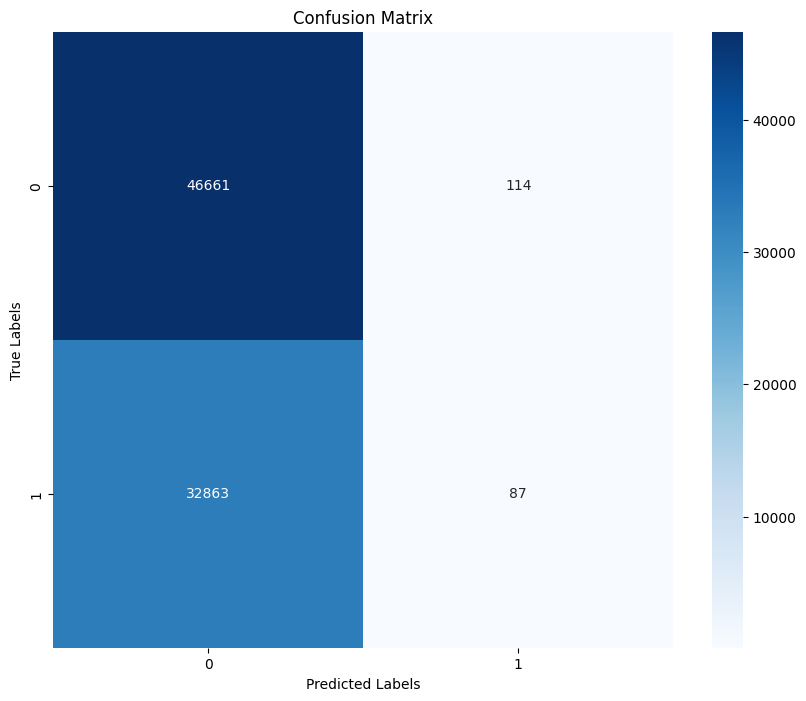

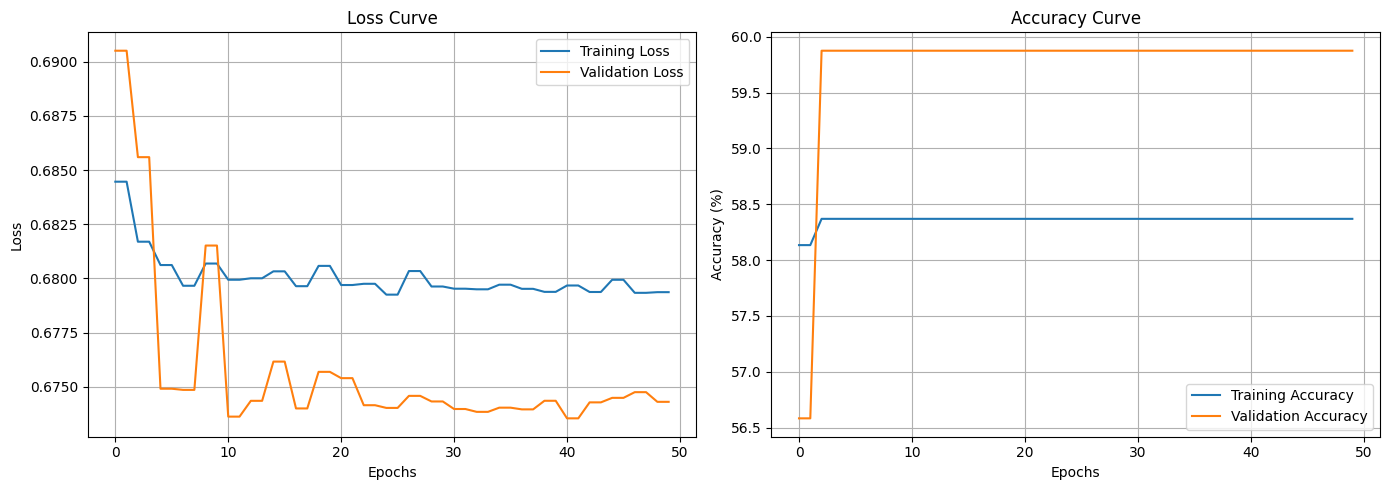

In [32]:
model_normal_ce = train_model(dataloaders=dataloaders, model=model, optimizer=optimizer, num_epochs=25)
torch.save(model.state_dict(), 'myModel')

In [21]:
def plot_metrics(train_metrics, val_metrics, num_epochs):
    epochs = range(len(train_metrics['loss']))

    plt.figure(figsize=(14, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_metrics['loss'], label='Training Loss')
    plt.plot(epochs, val_metrics['loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_metrics['accuracy'], label='Training Accuracy')
    plt.plot(epochs, val_metrics['accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()